<a href="https://colab.research.google.com/github/JaperTai77/Tensorflow_DL/blob/main/tf2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorflow Classification (Binary)

In [ ]:
from sklearn.datasets import make_circles
n = 1000
X,y = make_circles(n, noise =0.03)

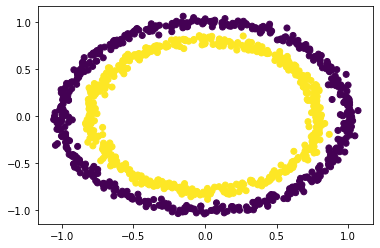

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1],'label':y})
plt.scatter(X[:,0],X[:,1],c = y)

In [ ]:
X

array([[ 0.05117661,  0.94837308],
       [ 0.34971438, -0.95754397],
       [ 0.35374265,  0.9389737 ],
       ...,
       [ 0.25755923,  0.75180093],
       [ 0.30337381, -0.99510035],
       [ 0.78872057, -0.1376436 ]])

In [ ]:
X.shape

(1000, 2)

#### Steps in Modelling

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              )
model.fit(X,y, epochs = 10,verbose=0)
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.8092 - accuracy: 0.4860


[0.8091794848442078, 0.4860000014305115]

 Visualize

In [ ]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-1,1, 100),
                     np.linspace(-1,1, 100))
xx[1]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [ ]:
x = np.c_[xx.ravel(), yy.ravel()]
x[0:10]

array([[-1.        , -1.        ],
       [-0.97979798, -1.        ],
       [-0.95959596, -1.        ],
       [-0.93939394, -1.        ],
       [-0.91919192, -1.        ],
       [-0.8989899 , -1.        ],
       [-0.87878788, -1.        ],
       [-0.85858586, -1.        ],
       [-0.83838384, -1.        ],
       [-0.81818182, -1.        ]])

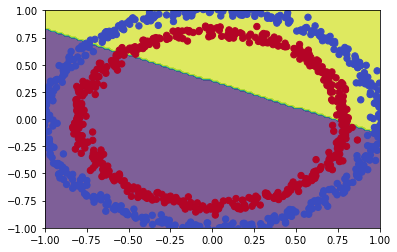

In [ ]:
ypred = model.predict(x)
ypred = np.round(ypred).reshape(xx.shape)
plt.contourf(xx, yy, ypred, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

#### Improve model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])
model.fit(X,y,epochs=10,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5120


[0.687142550945282, 0.5120000243186951]

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])
model.fit(X,y,epochs=100,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.8530


[0.5852629542350769, 0.8529999852180481]

could try different learning rate

Visualize

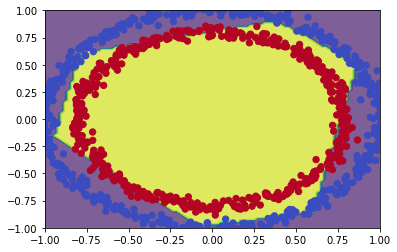

In [ ]:
ypred = model.predict(x)
ypred = np.round(ypred).reshape(xx.shape)
plt.contourf(xx, yy, ypred, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

#### Train-test split

In [ ]:
Xtrain = X[:800]; ytrain = y[:800]
Xtest = X[800:]; ytest = y[800:]

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])
history = model.fit(Xtrain,ytrain,epochs=100,verbose=0)
model.evaluate(Xtrain,ytrain)

25/25 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.9862


[0.134170264005661, 0.9862499833106995]

In [ ]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (32, 4)                   12        
_________________________________________________________________
dense_79 (Dense)             (32, 1)                   5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(Xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9450


[0.15093457698822021, 0.9449999928474426]

loss and training

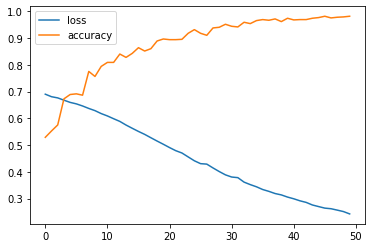

In [ ]:
pd.DataFrame(history.history).plot()

#### Callbacks

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid))
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = 'Adam',
              metrics = 'accuracy')
# set of learning rate from 1e-4, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model.fit(Xtrain,ytrain,epochs = 100, callbacks=lr_scheduler,verbose=0)


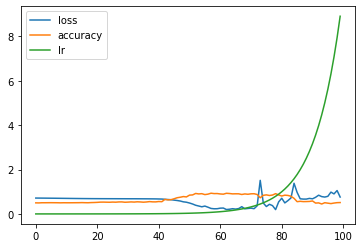

In [ ]:
pd.DataFrame(history.history).plot()

Text(0, 0.5, 'Loss')

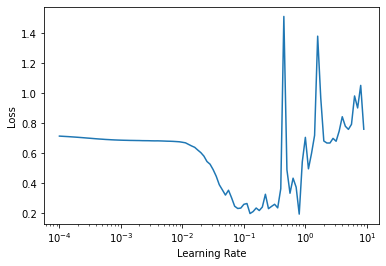

In [ ]:
plt.semilogx(history.history['lr'], history.history["loss"]) # learning rate be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

Ideal learning rate at somewhere near the lowest point

In [ ]:
# use ideal leaning rate 0.8
model = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                            tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(Xtrain,ytrain, epochs = 50,verbose=0)
model.evaluate(Xtrain,ytrain)

25/25 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9950


[0.13377408683300018, 0.9950000047683716]

In [ ]:
model.evaluate(Xtest,ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9950


[0.12901531159877777, 0.9950000047683716]

#### Evaluation

In [ ]:
pred = model.predict(Xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
pred = tf.round(pred)
confusion_matrix(ytest,pred)

array([[101,  11],
       [  0,  88]])

# Multiclass Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_data.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [ ]:
pd.value_counts(test_labels)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [3]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Build model

In [ ]:
train_data.dtype

dtype('uint8')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten in into vector
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation="softmax")])

# data type is int, we use SparseCategoricalCrossentropy
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data,train_labels,epochs=10,
                    validation_data=(test_data, test_labels), verbose=0)

model.evaluate(train_data,train_labels)

1875/1875 [==============================] - 3s 2ms/step - loss: 1.7216 - accuracy: 0.2370


[1.7216092348098755, 0.23703333735466003]

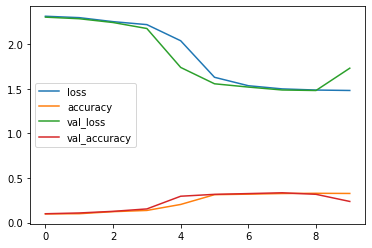

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# or use tf.onehot

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# data type is onehot, we use CategoricalCrossentropy
model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# use tf.onehot(,depth = number of categories)
history2 = model2.fit(train_data,tf.one_hot(train_labels, depth = 10),epochs=10,
                    validation_data=(test_data, tf.one_hot(test_labels,depth = 10)), verbose=0)

model2.evaluate(train_data,tf.one_hot(train_labels, depth = 10))

1875/1875 [==============================] - 3s 2ms/step - loss: 1.4464 - accuracy: 0.3769


[1.4464433193206787, 0.3768666684627533]

#### Scale data

In [14]:
n = float(train_data.max()) # so dataset is using float
train_data = train_data / n
test_data = test_data / n

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data,tf.one_hot(train_labels, depth = 10),epochs=10,
                    validation_data=(test_data, tf.one_hot(test_labels,depth = 10)), verbose=0)
model.evaluate(train_data,tf.one_hot(train_labels, depth = 10))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.5702 - accuracy: 0.7993


[0.5702127814292908, 0.7992500066757202]

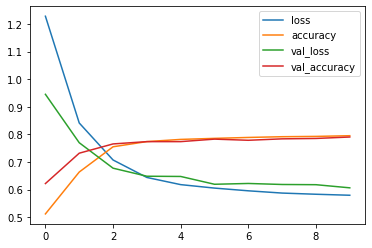

In [ ]:
pd.DataFrame(history.history).plot()

### Different learning rate

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4,activation = 'relu'))
model.add(tf.keras.layers.Dense(4,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(train_data,train_labels, epochs = 50,
                    validation_data = (test_data,test_labels),
                    callbacks = [lr], verbose = 0)
model.evaluate(train_data, train_labels)

1875/1875 [==============================] - 3s 2ms/step - loss: 1.7415 - accuracy: 0.1999


[1.741463303565979, 0.19991666078567505]

Text(0.5, 0, 'Learning rate')

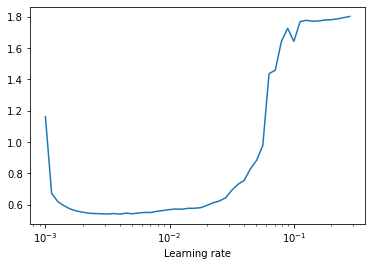

In [16]:
plt.semilogx(history.history['lr'], history.history["loss"])
plt.xlabel("Learning rate")

ideal learning rate is somewhere near 0.001

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4,activation = 'relu'))
model.add(tf.keras.layers.Dense(4,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['accuracy'])
history = model.fit(train_data,train_labels, epochs = 15,
                    validation_data = (test_data,test_labels), 
                    verbose = 0) 
model.evaluate(train_data, train_labels)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6558 - accuracy: 0.7734


[0.6557756662368774, 0.7733500003814697]

In [18]:
model.evaluate(test_data,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.7185 - accuracy: 0.7641


[0.7185431122779846, 0.7641000151634216]

### Evaluation

In [19]:
pred = model.predict(test_data)
pred[0]

array([1.9305850e-10, 3.5092816e-16, 1.0769385e-11, 1.8146827e-06,
       1.9817902e-08, 2.0843455e-01, 1.2292037e-07, 1.4594062e-01,
       2.5266355e-03, 6.4309627e-01], dtype=float32)

In [20]:
pred = pred.argmax(axis = 1)
pred[:10]

array([9, 2, 1, 1, 0, 1, 4, 4, 5, 7])

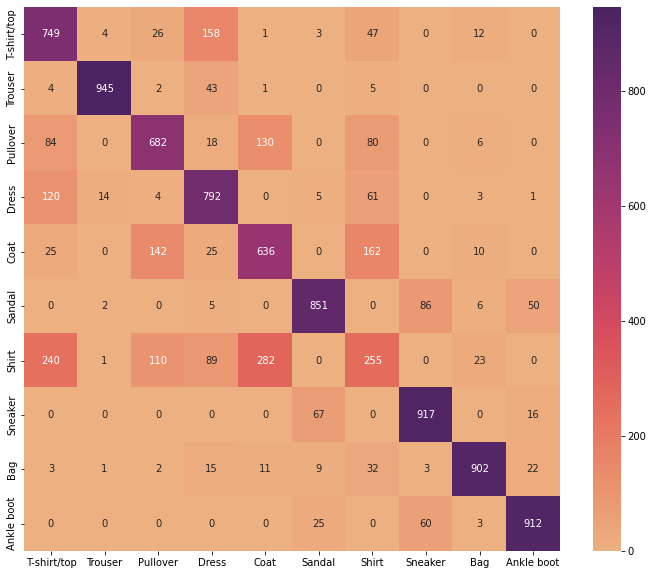

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
M = confusion_matrix(y_true=test_labels, y_pred=pred)

plt.figure(figsize = (12,10))
sns.heatmap(M,annot = True, cmap = 'flare',fmt = 'd',
            xticklabels=class_name, yticklabels = class_name)
plt.show()

In [29]:
test_data[0].shape

(28, 28)

In [33]:
def random_image(mod = model, image = test_data, label = test_labels, classname = class_name):
  import random
  i = random.randint(0,len(image))

  target = image[i]
  prob = model.predict(target.reshape(1,28,28))
  pred = classname[prob.argmax()]
  true = classname[label[i]]

  plt.imshow(target) # cmap=plt.cm.binary for black/white image
  if pred == true:
    c = 'green'
    plt.xlabel('Prediction is correct. Prediction is {}, prob: {:2.0f}%'.format(true,100*tf.reduce_max(prob)), # get the max value
               color = c, fontsize = 14)
  else:
    c = 'red'
    plt.xlabel('True prediction is {}, predicted {}, prob: {:2.0f}%'.format(true, pred, 100*tf.reduce_max(prob)), # get the max value
               color = c, fontsize = 14)


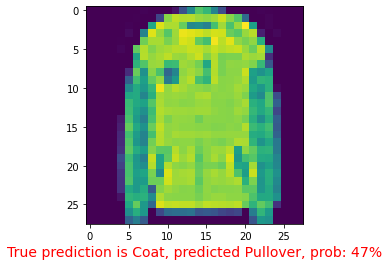

In [36]:
random_image()

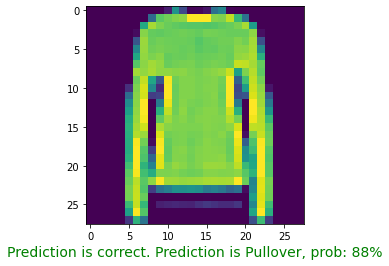

In [37]:
random_image()

### Patterns

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.layers

In [44]:
weight, bias = model.layers[1].get_weights()
weight[:2]

array([[ 0.20066875, -0.28424576, -0.19428189, -0.2692642 ],
       [ 0.1951509 , -0.4716188 , -0.02040107, -0.44570577]],
      dtype=float32)

In [40]:
print(28*28)
print(weight.shape)

784
(784, 4)


In [47]:
print(bias)
print(bias.shape)

[0.46733394 2.2156608  1.5880219  0.56516314]
(4,)


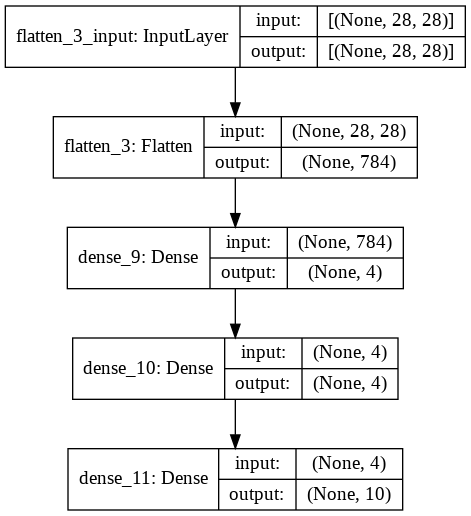

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)